In [55]:
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import mysql.connector
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Connect to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Anaghavs@09",
    database="Amusement_Park"
)

In [56]:
db_name = "Amusement_Park"
db_host = "localhost"
db_username = "root"
db_password = "Anaghavs@09"

try:
    conn = pymysql.connect(host = db_host,
                           port = int(3306),
                           user = "root",
                           password = db_password,
                           db = db_name)
except e:
    print (e)
if conn:
    print ("connection successful")
else:
        print ("error")


connection successful


# Query - 1 
## Total number of rides in the park

In [57]:
q1 = pd.read_sql_query("""
SELECT COUNT(Activity_Name) AS Number_of_Activities 
FROM activities;
""", conn)
q1

,Number_of_Activities
0,60


# Query - 2
## Top 10 customer with highest expense cost in the park

In [58]:
q2 = pd.read_sql_query("""
SELECT C.Customer_Name, E.total_expense FROM( 
SELECT Customer_ID, SUM(Expense_cost) as total_expense
FROM expense
GROUP BY 1) E
LEFT OUTER JOIN customers C
ON E.Customer_ID = C.Customer_ID
ORDER BY 2 DESC
LIMIT 10;"""
, conn)
q2

,Customer_Name,total_expense
0,Rosabel Leads,192.0
1,Bill Artis,182.0
2,Fairleigh Gilliam,170.0
3,Tanhya Boldero,169.0
4,Sawyer Verdie,161.0
5,Verine Waleworke,160.0
6,Nadia Tulloch,157.0
7,Grove Nind,156.0
8,Lucio Trembley,155.0
9,Coretta Grigoire,154.0


# Query - 3
## Average ratings for activities

In [59]:
q3 = pd.read_sql_query("""
SELECT Activity_Name, AVG(Ratings) AS Average_Ratings
FROM feedback
GROUP BY 1
ORDER BY 2 DESC;
""",conn)
q3

,Activity_Name,Average_Ratings
0,Jack Rabbit (Kennywood),3.6250
1,Aero Dips,3.6000
2,Giant Dipper (Belmont Park),3.5500
3,Jack Rabbit (Seabreeze),3.5333
4,The Bobs (roller coaster),3.5294
5,The Thriller (roller coaster),3.5294
6,Lightning (Revere Beach),3.4706
7,The Wild One (roller coaster),3.4500
8,Restaurant - 4,3.4348
9,Restaurant - 2,3.3000


# Query - 4
## Total expense cost over different months

In [60]:
q4 = pd.read_sql_query("""
WITH RECURSIVE TOTAL_EXPENSE_COST AS(
SELECT 
YEAR(Expense_Date) AS YEAR,
MONTH(Expense_Date) AS MONTH,
SUM(Expense_cost) AS TOTAL_EXPENSE_COST
FROM expense
GROUP BY 1,2
ORDER BY 2)
SELECT * FROM TOTAL_EXPENSE_COST;
""",conn)
q4


,YEAR,MONTH,TOTAL_EXPENSE_COST
0,2022,1,4846.0
1,2022,2,4547.0
2,2022,3,4013.0
3,2022,4,4718.0
4,2022,5,4979.0
5,2022,6,4000.0
6,2022,7,4029.0
7,2022,8,4056.0
8,2022,9,4042.0
9,2022,10,5249.0


# Query - 5
## Customer names who are below average spendings

In [61]:
q5 = pd.read_sql_query("""
WITH A AS(
SELECT Customer_Name, SUM(E.Expense_cost) as Expense_cost
FROM customers C
LEFT JOIN expense E
ON C.Customer_ID = E.Customer_ID
GROUP BY 1
)
SELECT Customer_Name FROM A
WHERE Expense_cost < (SELECT AVG(Expense_cost)
						FROM A);
"""
,conn)
q5

,Customer_Name
0,Dorolice Delia
1,Pip Treweke
2,Paten Possek
3,Tibold Currey
4,Elyn Pumphrey
...,...
517,Craig Aimer
518,Nowell Dewett
519,Belinda Zemler
520,Almira Jiggen


# Analytics

## Average rating for top 10 activities

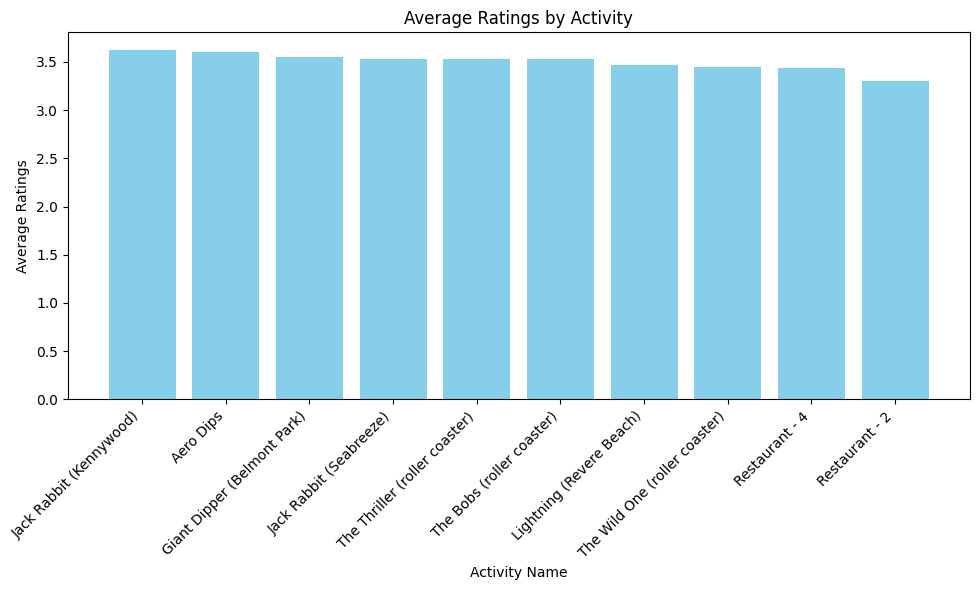

In [49]:
df = pd.read_sql_query(
"""
SELECT Activity_Name, AVG(Ratings) AS Average_Ratings
FROM feedback
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
"""
,conn)

plt.figure(figsize=(10, 6))
plt.bar(df['Activity_Name'], df['Average_Ratings'], color='skyblue')
plt.xlabel('Activity Name')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Activity')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In the above bar chart it is found that the Activity named Jack Rabbit has the highest ratings throughout the amusement park.
This also depicts the top 10 best rated activities.

## Percentage distribution of types of tickets

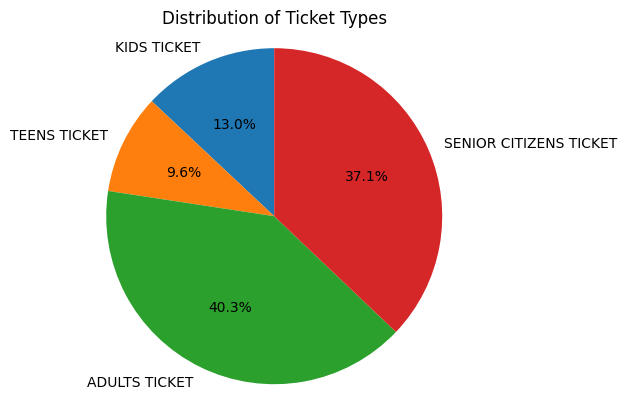

In [62]:
df1 = pd.read_sql_query("""
SELECT A.Ticket_Type, COUNT(B.Age) as Count
FROM entry_ticket A
LEFT JOIN customers B ON A.Ticket_ID = B.Ticket_ID
GROUP BY 1
"""
,conn)

plt.pie(df1['Count'], labels=df1['Ticket_Type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Ticket Types')
plt.show()

The above pie chart shows the percentage distribution of ticket types bought by the customers.

## Total cost spent by customers in the year 2022

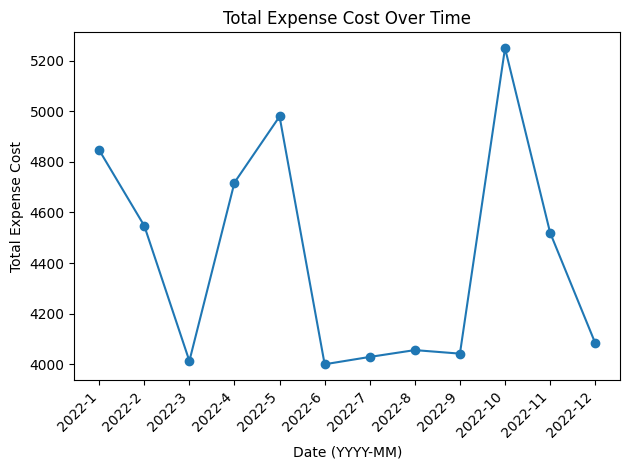

In [63]:
df2 = pd.read_sql_query("""
WITH RECURSIVE TOTAL_EXPENSE_COST AS(
SELECT 
YEAR(Expense_Date) AS YEAR,
MONTH(Expense_Date) AS MONTH,
SUM(Expense_cost) AS TOTAL_EXPENSE_COST
FROM expense
GROUP BY 1,2
ORDER BY 2)
SELECT * FROM TOTAL_EXPENSE_COST;
"""
,conn)

plt.plot(df2['YEAR'].astype(str) + '-' + df2['MONTH'].astype(str), df2['TOTAL_EXPENSE_COST'], marker='o')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Total Expense Cost')
plt.title('Total Expense Cost Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above line graph depicts the total sales of the amusement park throughout the year 2022,
starting from January as "2022-1" to December as "2022-12". It can be seen that the highest sales
for the park was in the month of October whereas the lowest sales was in the month of June.

## Distribution of customer ages

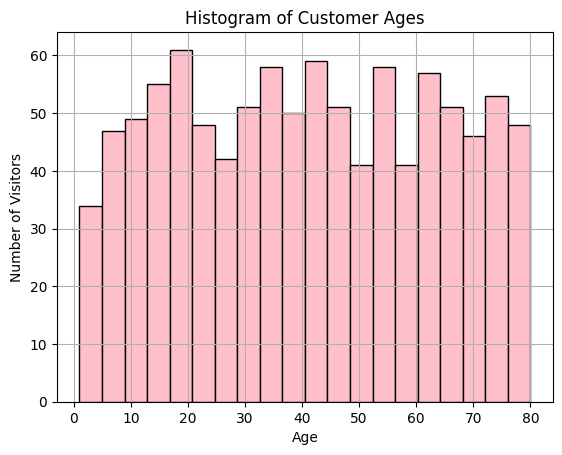

In [64]:
cursor = connection.cursor()

query = "SELECT Age FROM CUSTOMERS"
cursor.execute(query)

ages = cursor.fetchall()

cursor.close()
connection.close()

ages = [age[0] for age in ages if age[0] is not None]

plt.hist(ages, bins=20, color='pink', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Visitors')
plt.title('Histogram of Customer Ages')
plt.grid(True)
plt.show()


The depicted histogram illustrates the distribution of customers across various age groups. Notably, the highest concentration of visitors falls within the 20-year age bracket, whereas individuals aged 50 and 60 constitute the least represented age groups in the park.

## Scatter plot - Entry cost vs Wait time for top 10 activities by total customer count

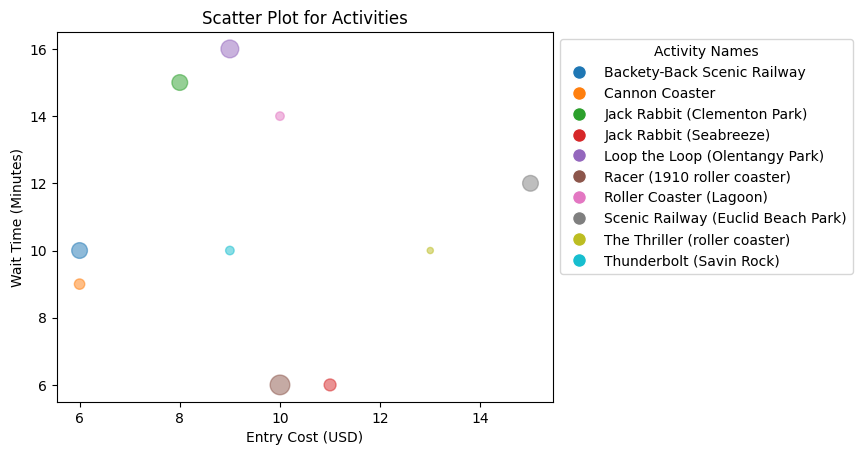

In [65]:
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Anaghavs@09",
    database="Amusement_Park"
)

cursor = connection.cursor()

query = """
    SELECT A.Activity_Name, R.Entry_Cost_in_USD, R.Wait_Time_in_Minutes, COUNT(AC.Customer_ID) AS Total_Customers
    FROM RIDES R
    LEFT JOIN ACTIVITIES A ON R.Activity_ID = A.Activity_ID
    LEFT JOIN ACCESSES AC ON R.Activity_ID = AC.Activity_ID
    GROUP BY 1, 2, 3
    ORDER BY 4 DESC
    LIMIT 10
"""

cursor.execute(query)

results = cursor.fetchall()

cursor.close()
connection.close()

activity_names = [result[0] for result in results]
entry_costs = [result[1] for result in results]
wait_times = [result[2] for result in results]
customer_counts = [result[3] for result in results]

scaler = MinMaxScaler(feature_range=(20, 200))  # Adjust the range of bubble sizes
bubble_sizes = scaler.fit_transform([[count] for count in customer_counts])

# Mapping between activity names and colors
colors = [f'C{i}' for i in range(len(set(activity_names)))]
color_map = dict(zip(sorted(set(activity_names)), colors))

# Plotting the scatter plot with normalized bubble sizes and legend
fig, ax = plt.subplots()
scatter = ax.scatter(entry_costs, wait_times, s=bubble_sizes, alpha=0.5, c=[color_map[activity] for activity in activity_names])

# Adding legend based on activity names and colors
legend_labels = sorted(set(activity_names))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10, label=label) for label in legend_labels]
ax.legend(handles=legend_handles, title='Activity Names', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Scatter Plot for Activities')
plt.xlabel('Entry Cost (USD)')
plt.ylabel('Wait Time (Minutes)')
plt.show()

Analyzing the provided scatter plot reveals that the 'Scenic Railway' ride stands out as the most costly, demanding a waiting time of 12 minutes. In stark contrast, the 'Racer' boasts the briefest wait time, coupled with an affordable entry fee of $10.